In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv('C:\Users\padarsh\Desktop\data.csv')

In [4]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data.columns

Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')

## Data cleaning , checking for missing value and outliers 

In [96]:
#Checking for missing value
def checkForMisssingValue():
    if True in data.isnull():
        print 'data set has null'
    else:
        print 'No missing value'
      

In [97]:
checkForMisssingValue()

No missing value


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
neg_index=data[(data.Quantity<0) | (data.UnitPrice<=0)].index

In [9]:
data.drop(neg_index,inplace=True)

In [10]:
cleaned_date=pd.to_datetime(data.loc[:,'InvoiceDate'])

In [11]:
data.shape

(530104, 8)

In [12]:
data.loc[:,'InvoiceDate']=cleaned_date

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [14]:
data.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Perform the Time Series analysis on the sale of different products.

## Drop all other columns but StockCode , Qnatity and Invoice date

In [18]:
data_df1=data[['StockCode','Quantity','InvoiceDate']]

In [19]:
stock_df=data_df1.groupby('StockCode')

In [20]:
#Lets see how was sell for StockCode 22469, first let see the values in this groups
product_22469=data_df1.loc[stock_df.groups.get('22469'),['Quantity','InvoiceDate']]
product_22469.describe()

,Quantity
count,1226.000000
mean,14.658238
std,57.959295
min,1.000000
25%,2.000000
50%,6.000000
75%,12.000000
max,1356.000000


In [22]:
def create_df_per_product(StockCode):
    idx_val=stock_df.groups.get(StockCode)
    return data_df1.loc[idx_val,['Quantity','InvoiceDate']]
    

In [46]:
def plot_time_series_per_product_sale(StockCode):
    df=create_df_per_product(StockCode)
    plt.figure(figsize=(14,10))
    plt.plot_date(x='InvoiceDate', y='Quantity', fmt="r-",xdate=True,alpha=0.5,animated=True,data=df)
    plt.title('Product with StockCode-> '+StockCode+' ::'+data.loc[int(StockCode),'Description'])
    plt.ylabel('Sales number')
    plt.show()
    

In [49]:
#product StockCode list, to plot time serieas analysis on all items we can iterate through this list and call
# plot function to plot the graph
products=stock_df.groups.keys()

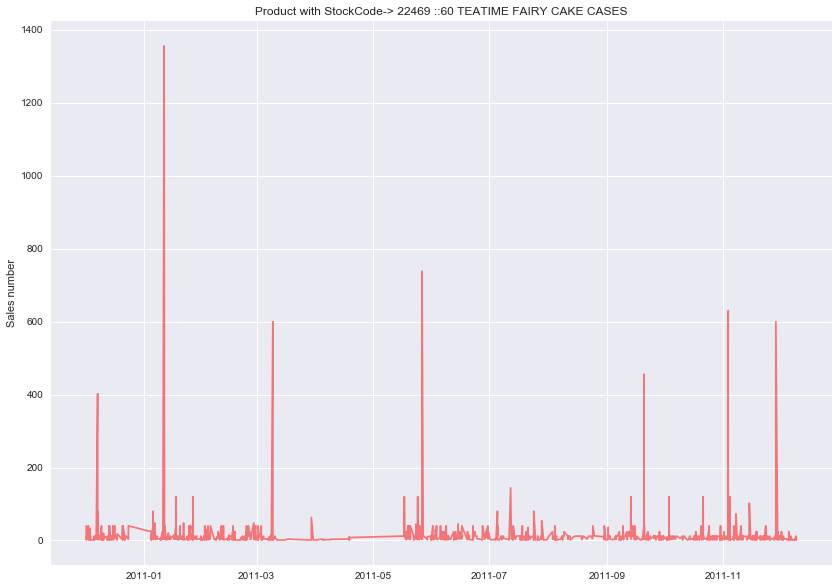

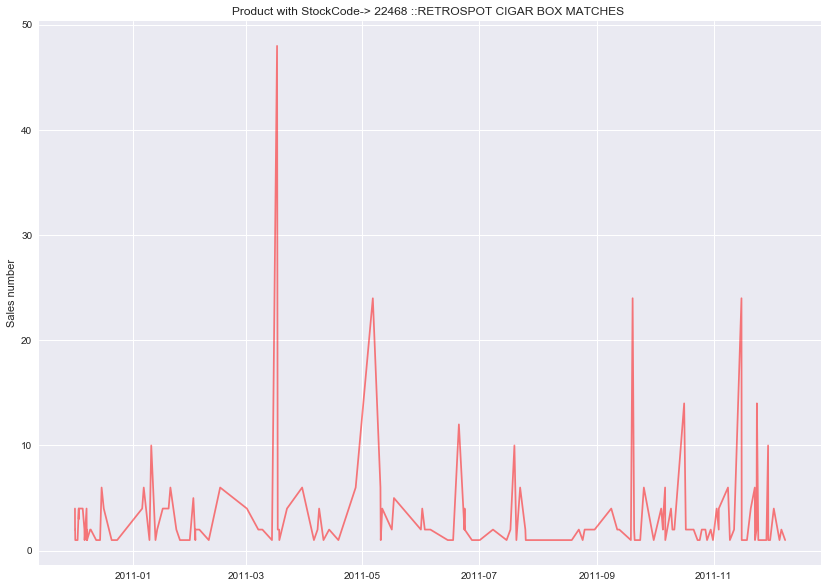

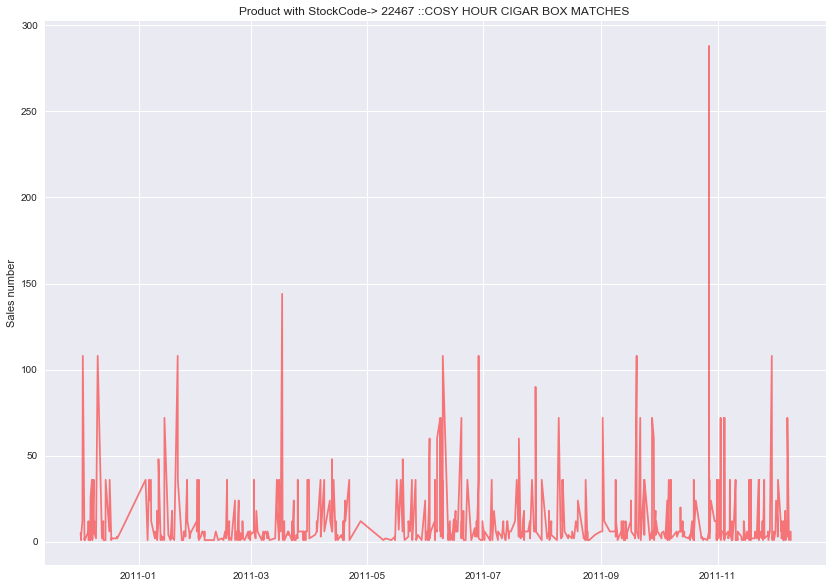

In [48]:
#Lets see the performace of 3 product with StockCode ['22469','22468','22467'] during the time periods
for x in ['22469','22468','22467']:
    plot_time_series_per_product_sale(x)
    


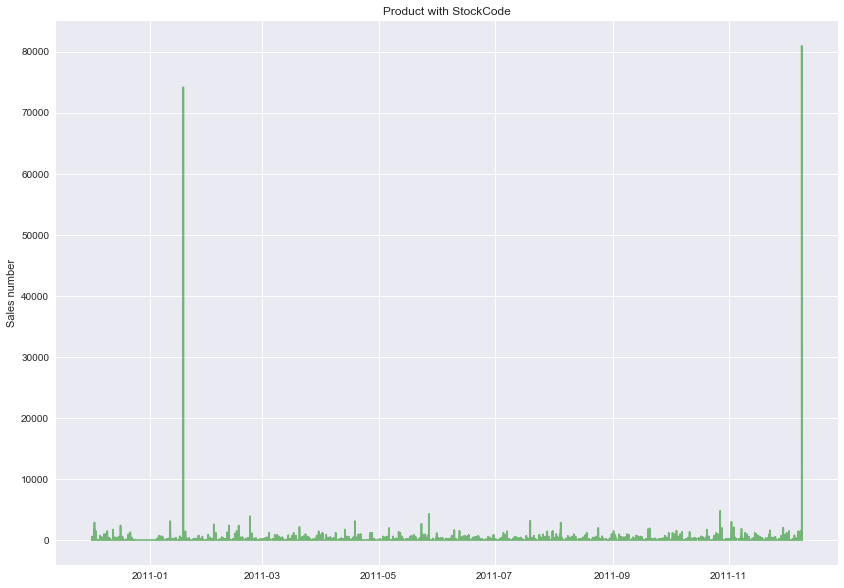

In [53]:
#Lets plot overall sales figure during the year
df=data_df1[['InvoiceDate','Quantity']]
plt.figure(figsize=(14,10))
plt.plot_date(x='InvoiceDate', y='Quantity', fmt="g-",xdate=True,alpha=0.5,animated=True,data=df)
plt.title('Product with StockCode')
plt.ylabel('Sales number')
plt.show()

#  Over all highesr Sale of product was recorded during Jan - feb and Decemeber end .
Individual product sell are varing through out the year depends upon the product type

## Variation of the prices of goods according to the change in date and time.

In [54]:
data_df2=data[['StockCode','UnitPrice','InvoiceDate']]

In [56]:
stock_df_unitprice=data_df1.groupby('StockCode')

In [58]:
def create_df_per_product_for_unitprice(StockCode):
    idx_val=stock_df_unitprice.groups.get(StockCode)
    return data_df2.loc[idx_val,['UnitPrice','InvoiceDate']]

In [60]:
def plot_time_series_per_product_unitprice(StockCode):
    df=create_df_per_product_for_unitprice(StockCode)
    plt.figure(figsize=(14,10))
    plt.plot_date(x='InvoiceDate', y='UnitPrice', fmt="r-",xdate=True,alpha=0.5,animated=True,data=df)
    plt.title('Product with StockCode-> '+StockCode+' ::'+data.loc[int(StockCode),'Description'])
    plt.ylabel('Unit price')
    plt.show()

In [61]:
products=stock_df_unitprice.groups.keys()

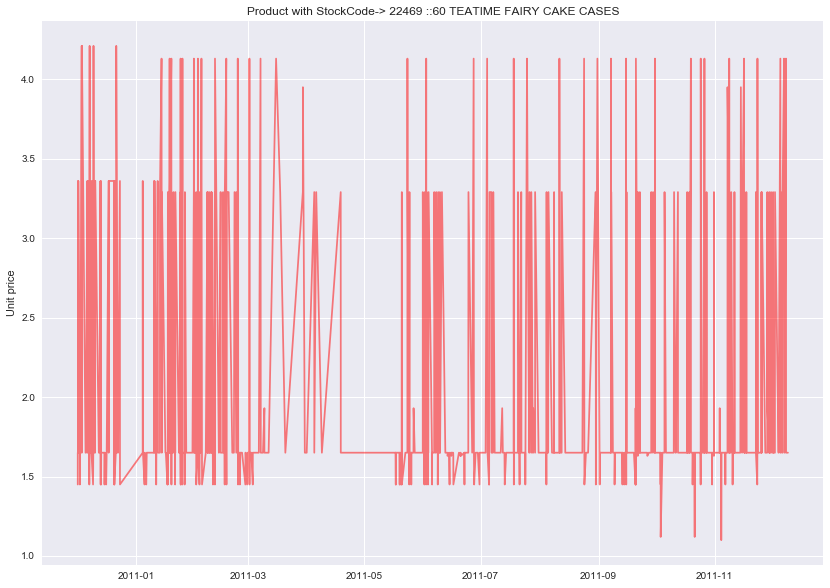

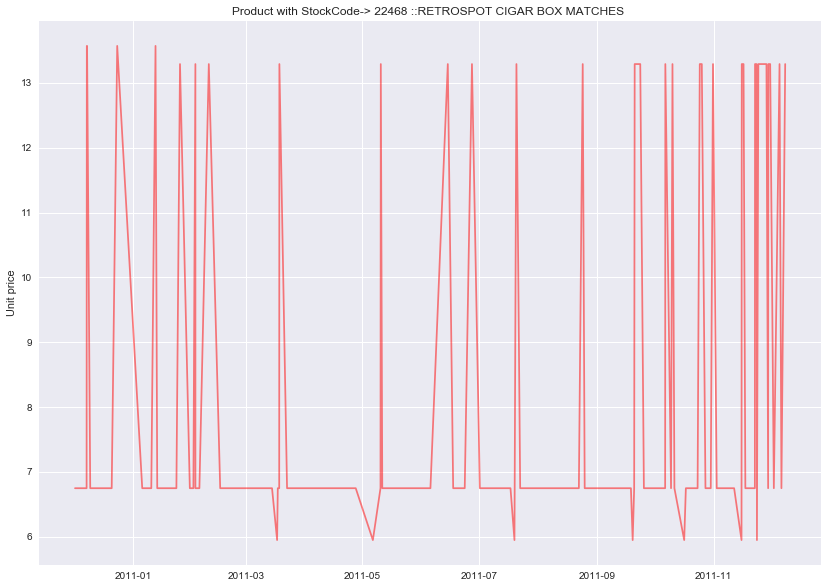

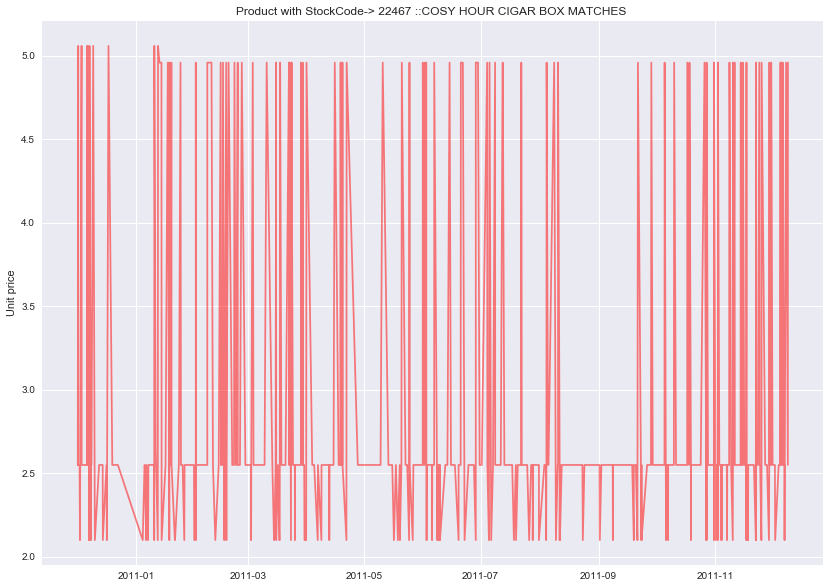

In [63]:
#Lets see the unitprice of 3 product with StockCode ['22469','22468','22467'] during the time periods
for x in ['22469','22468','22467']:
    plot_time_series_per_product_unitprice(x)

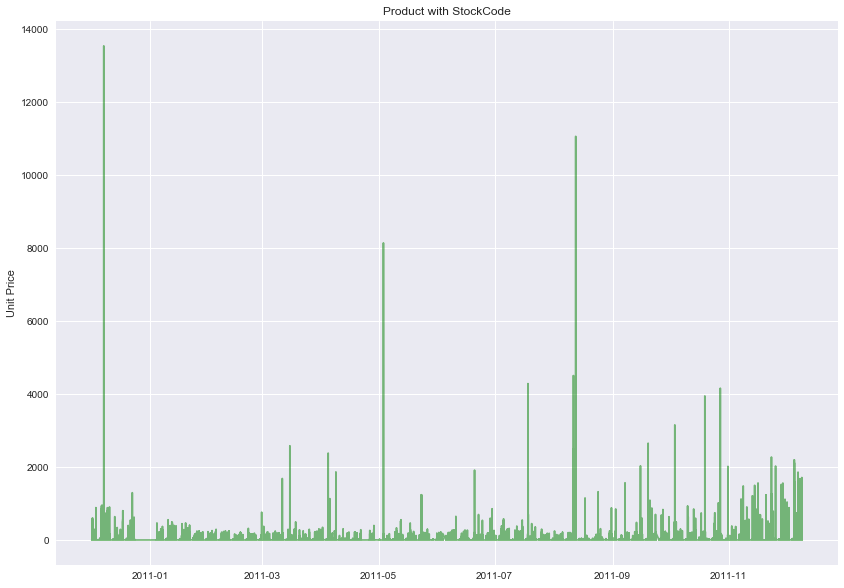

In [64]:
#Lets plot overall unitprice variance figure during the year
df=data_df2[['InvoiceDate','UnitPrice']]
plt.figure(figsize=(14,10))
plt.plot_date(x='InvoiceDate', y='UnitPrice', fmt="g-",xdate=True,alpha=0.5,animated=True,data=df)
plt.title('Product with StockCode')
plt.ylabel('Unit Price')
plt.show()

## unit price are highest in Early Jan , May and mid August , Also highest sell was recorded just after the price drop in january , but higher Decemeber sell  number and unit price variation tells that sell could be higher due to holiday season, 

# Correlation between unit price and quantity sold

In [67]:
data_df3=data[['UnitPrice','Quantity']]

In [68]:
data_df3.corr()

,UnitPrice,Quantity
UnitPrice,1.000000,-0.003773
Quantity,-0.003773,1.000000


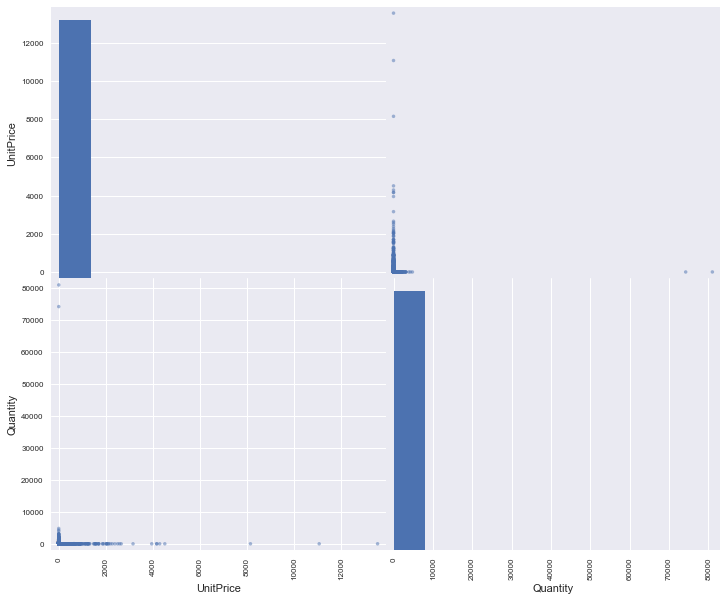

In [73]:
pd.plotting.scatter_matrix(data_df3, figsize=(12, 10))
plt.show()

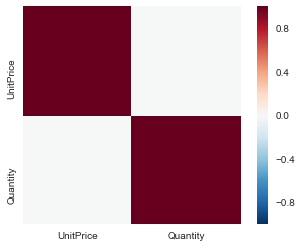

In [80]:
sns.heatmap(data_df3.corr(),square=True)

# WE can see from both correlation matrix and Graph that there is negative correlation between unit price and quantity sold

# # Checking if description has any effect on the price or sale of goods

In [74]:
data_df4=data[['UnitPrice','Quantity','Description']]

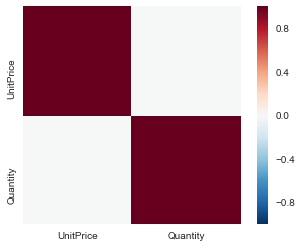

In [106]:
sns.heatmap(data_df4.corr(),square=True)

## There is not enough data to say that Description has affect on UNit price or Qunatity sold

# THanks !!!